In [2]:
import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = uproot.open("/home/users/nandan/tmp/CMSSW_14_1_5/src/RecoLocalTracker/SiStripClusterizer/test/test_study.root")  # replace with your ROOT file path
tree = file["sep19_2_2_dump_raw/tree"]

In [4]:
branches_to_load = ['pixeltrk_pt', 'hlttrk_pt', 'recotrk_pt', 'dr_min_pixelTrk', 'dr_reco', 'dr_hlt', 'pixeltrk_eta', 'hlttrk_eta', 'target']
df = tree.arrays(branches_to_load, library="pd")

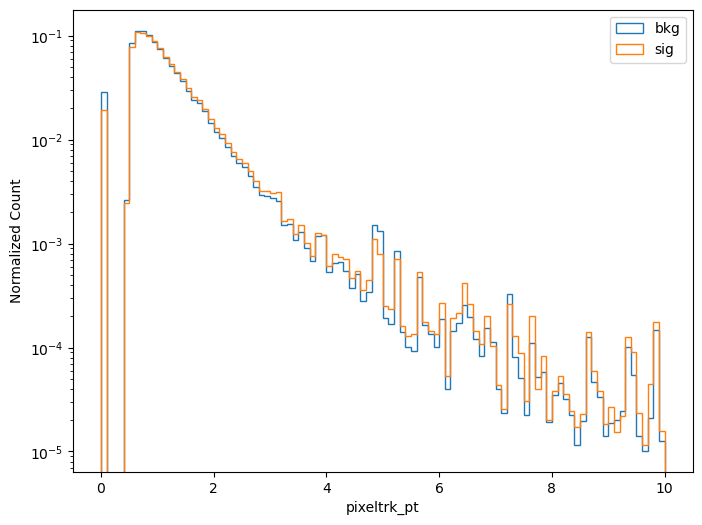

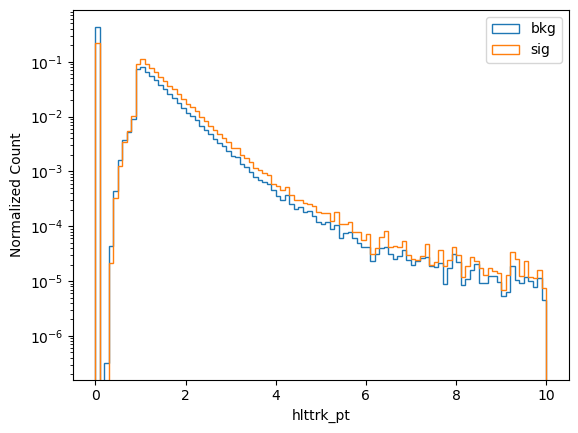

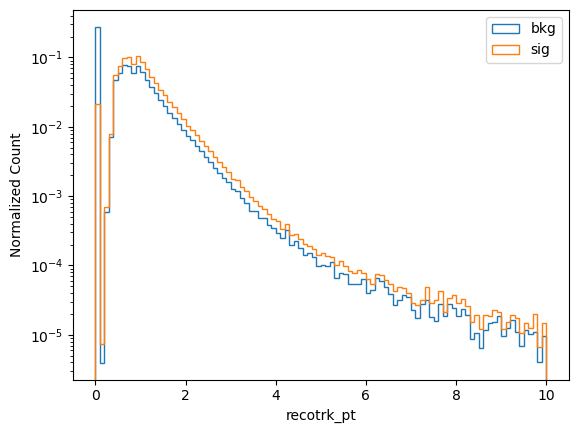

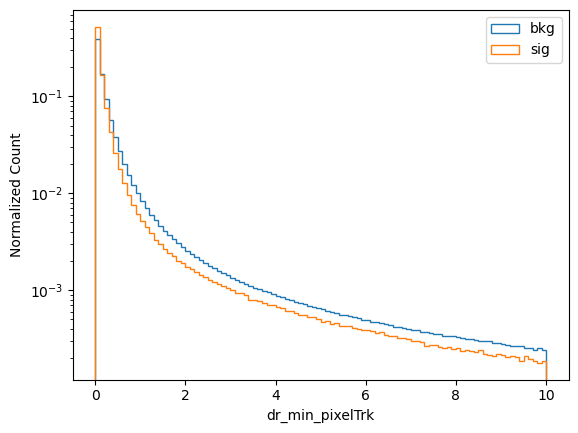

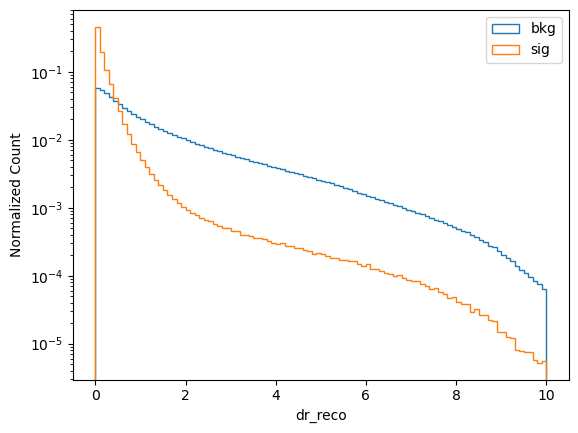

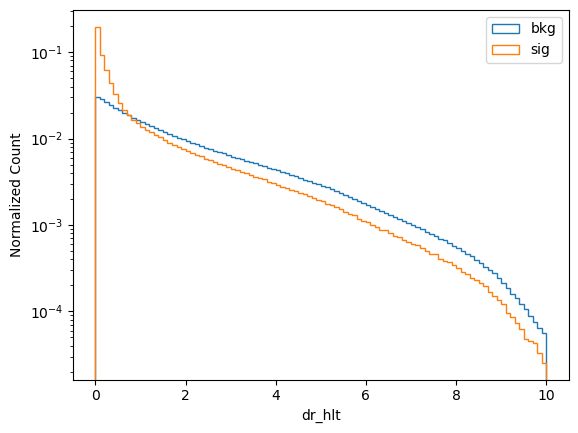

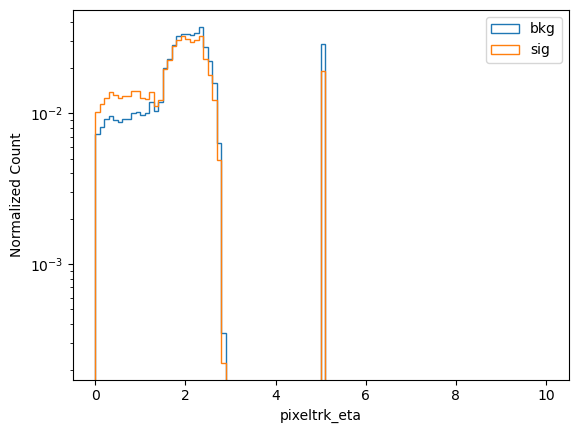

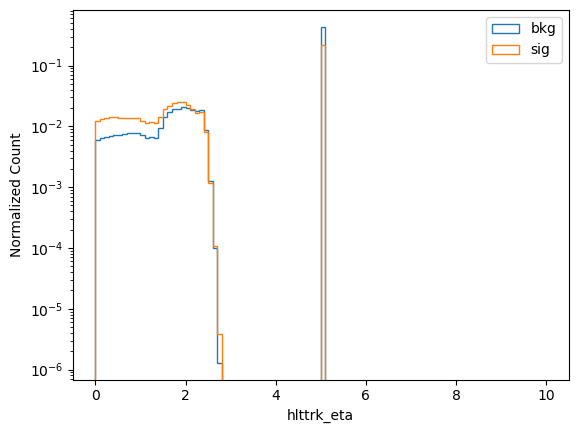

In [5]:
plt.figure(figsize=(8,6))
for var in branches_to_load:
  if var == 'target': continue
  for label in [0,1]:
      #if label == 1:
      data = df[df['target']==label][var]
      #else:
      #    data = df_bkg[var]
      weights = np.ones_like(data) / len(data)
      plt.hist(data, weights=weights,bins=100, range=(0,10), histtype='step',label='sig' if label==1 else 'bkg')
      plt.yscale('log')
      
  plt.xlabel(var)
  plt.ylabel("Normalized Count")
  plt.legend()
  plt.show()

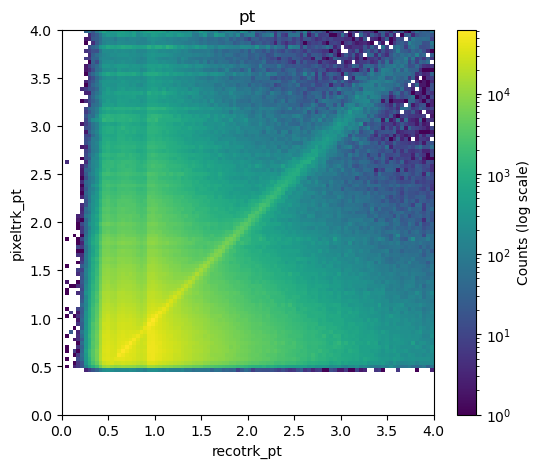

In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# Filter your DataFrame
df_filtered = df[(df['dr_hlt'] != 99) & (df['dr_reco'] != 99) & (df['dr_min_pixelTrk'] != 99)]

# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_pt'],
    df_filtered['pixeltrk_pt'],
    bins=100,
    range=[[0, 4], [0, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_pt')
ax.set_ylabel('pixeltrk_pt')
ax.set_title('pt')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()


In [7]:
print('reco track with pt < 0.05 ', ((df_filtered['recotrk_pt']>0) & (df_filtered['recotrk_pt'] < 0.05)).sum())

reco track with pt < 0.05  0


In [58]:
print('pixel track with pt < 0.45 ', ((df_filtered['pixeltrk_pt'] <0) & (df_filtered['pixeltrk_pt'] < 0.45)).sum())

pixel track with pt < 0.45  0


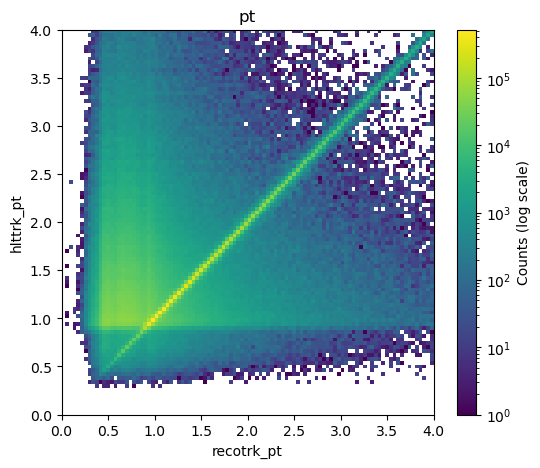

In [8]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['recotrk_pt'],
    df_filtered['hlttrk_pt'],
    bins=100,
    range=[[0, 4], [0, 4]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('recotrk_pt')
ax.set_ylabel('hlttrk_pt')
ax.set_title('pt')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

In [60]:
print('hlt track with pt < 0.2 ', ((df_filtered['hlttrk_pt'] >0) & (df_filtered['hlttrk_pt'] < 0.2)).sum())

hlt track with pt < 0.2  0


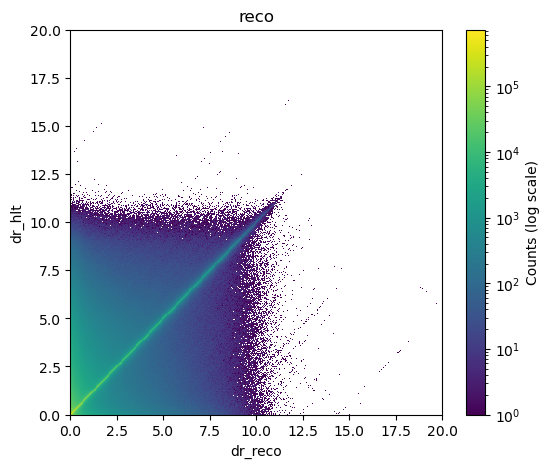

In [61]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['dr_reco'],
    df_filtered['dr_hlt'],
    bins=400,
    range=[[0, 20], [0, 20]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('dr_reco')
ax.set_ylabel('dr_hlt')
ax.set_title('reco')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()

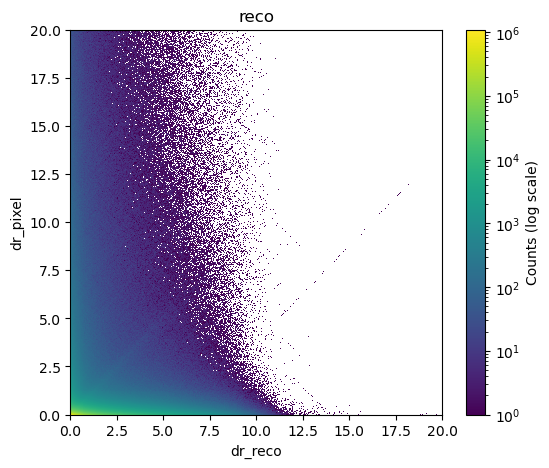

In [62]:
# Create figure and axis explicitly
fig, ax = plt.subplots(figsize=(6,5))

# 2D histogram
h = ax.hist2d(
    df_filtered['dr_reco'],
    df_filtered['dr_min_pixelTrk'],
    bins=400,
    range=[[0, 20], [0, 20]],
    cmap='viridis',
    norm=LogNorm()
)

ax.set_xlabel('dr_reco')
ax.set_ylabel('dr_pixel')
ax.set_title('reco')

# Add colorbar linked to the same axes
cbar = fig.colorbar(h[3], ax=ax)
cbar.set_label('Counts (log scale)')

plt.show()